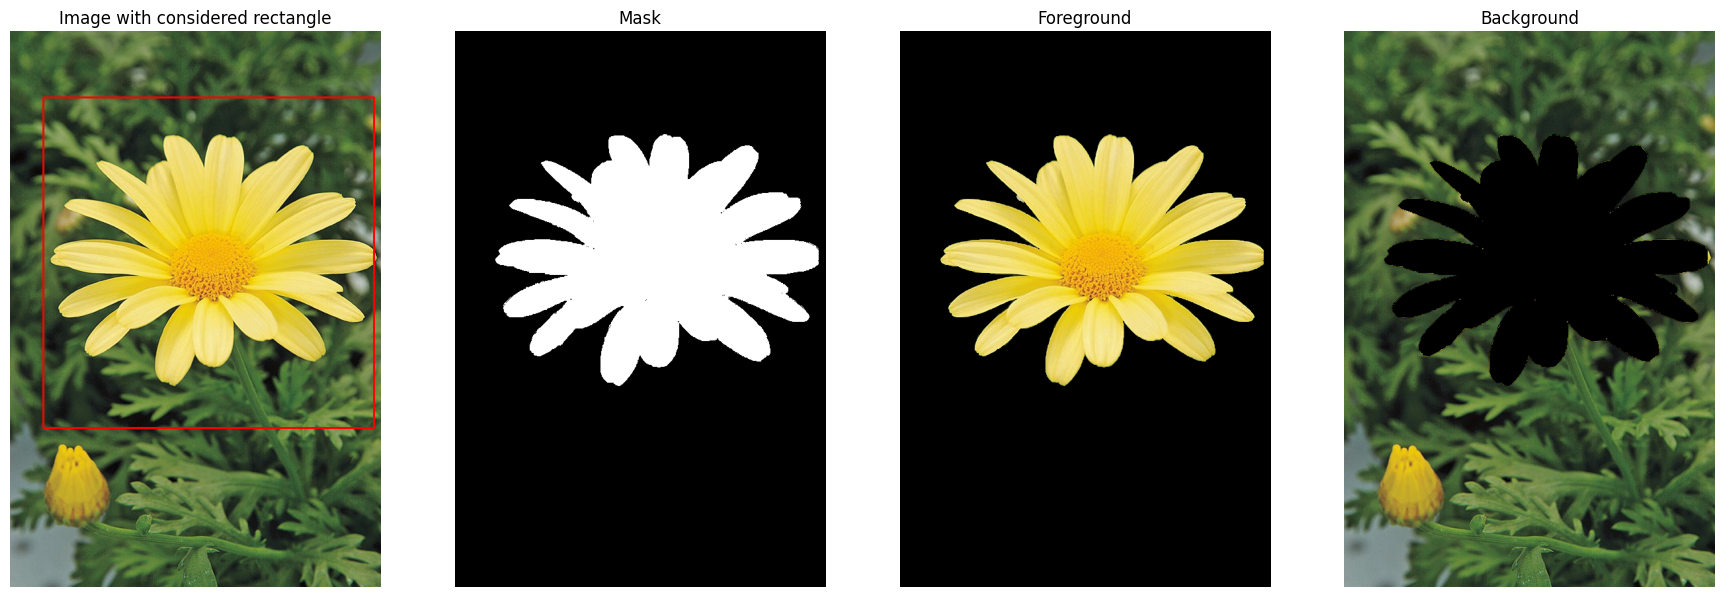

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('(8).jpg')
orig = cv.imread('(8).jpg')
orig = cv.cvtColor(orig, cv.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2],np.uint8)

# The array is initialized with 0 values
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# The rectangle is the area in which the foreground is present
rectangle = (50,100,500,500)

# GrabCut is used to extract the foreground from the image
cv.grabCut(im,mask,rectangle,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)

# The mask is updated such that all 0-pixels and 2-pixels are converted to 0-pixels
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# The foreground is extracted from the image
ForeGround = im*mask2[:,:,np.newaxis]
# The background is extracted from the image
BackGround = np.subtract(im,ForeGround)
# The foreground is replaced with a white background in original image
area = cv.rectangle(orig,(50,100),(550,600),(255,0,0),2)

# The foreground and background are displayed
fig, ax = plt.subplots(1,4, figsize=(22,10))
ax[0].imshow(orig)
ax[0].set_title('Image with considered rectangle')
ax[1].imshow(mask2*255, cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(cv.cvtColor(ForeGround,cv.COLOR_BGR2RGB))
ax[2].set_title('Foreground')
ax[3].imshow(cv.cvtColor(BackGround,cv.COLOR_BGR2RGB))
ax[3].set_title('Background')

for i in range(4):
    ax[i].axis('off')
plt.show()

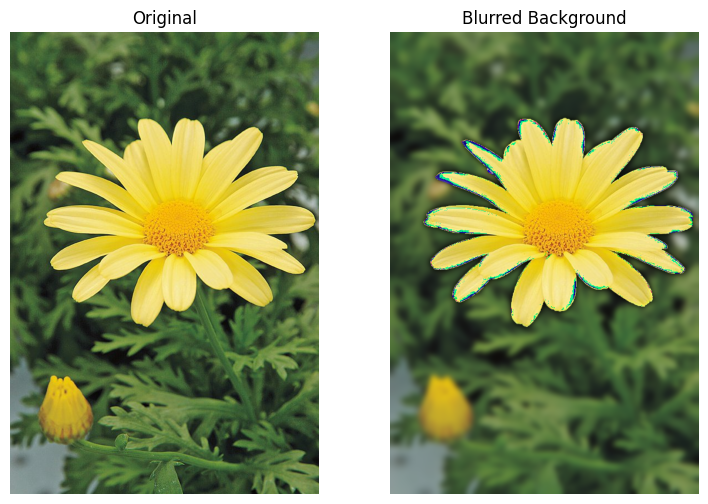

In [4]:
value = 5
# The background is blurred using a Gaussian filter
BG_gauss = cv.GaussianBlur(BackGround,(0,0),value)

blurred= np.add(ForeGround,BG_gauss)

fig,ax = plt.subplots(1,2, figsize=(9,6))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(blurred,cv.COLOR_BGR2RGB))
ax[1].set_title('Blurred Background')
for i in range(2):
    ax[i].axis('off')
plt.show()